# Having a peek at data

In [87]:
import pandas as pd
df=pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [88]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


**Task 1**:
TO find the reason behind the error first lets describe our dataset

In [89]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


As we can see that the mean of order amount here is 3145.128 which is what is given to us as AOV. However by looking at the dataset we can see that this is not a proper measure to find out the average cost per item as many customers might have bought more then one item

Also another factor that might be affecting this is outliers. So we will first check for the outlier user id that have spent too much. For that I will first groupby userid and then plot a scatter plot

In [90]:
df_grouped_user_id=df.groupby('user_id',as_index=False)['order_amount'].mean()

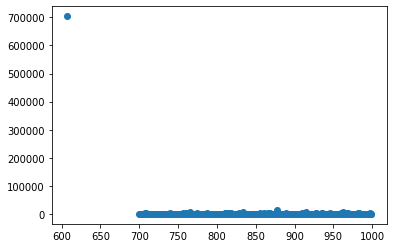

In [91]:
import matplotlib.pyplot as plt
plt.scatter(df_grouped_user_id['user_id'],df_grouped_user_id['order_amount'])

We can see that there is one outlier that is exceedingly spending more and might be negatively affecting our analysis.So we will be deleting the outlier data. 

In [92]:
selRows = df[df['user_id'] < 700].index
df = df.drop(selRows, axis=0)

So we will take into account number of items per order. We will find out the total order amount divided by to total items.

In [93]:
df['order_amount'].sum()/df['total_items'].sum()

378.1843800322061

So the more proper value of AOV is around 378.2.This gives us an better idea of the price at which each sneaker is being sold.

**Alternate metric is Revenue per visitor. As this is the money generated per customer who visits the store. Like other online business metrics, RPV helps you see what is working and not working in your company’s overall sales efforts. The revenue per visitor metric helps you evaluate new visitor acquisition efforts to see which strategies are working. RPV can also be used to determine how much you can afford to spend on paid user acquisition.**


In [94]:
df['order_amount'].sum()/len(df['user_id'].unique())

12525.466666666667

**RPV is 12525.47**

In [40]:
df['weekday']=pd.to_datetime(df['created_at']).dt.weekday

In [42]:
df_gropued_by_date=df.groupby('weekday')

In [44]:
df_gropued_by_date.describe()

order_id                                  ... average_order_amount                       
           count         mean          std   min  ...                  25%    50%    75%      max
weekday                                           ...                                            
0          635.0  2420.262992  1453.501090   1.0  ...                133.0  153.0  167.0  25725.0
1          698.0  2440.641834  1418.100890   3.0  ...                132.0  154.0  171.0  25725.0
2          821.0  2541.925700  1437.077208   5.0  ...                132.0  153.0  166.0  25725.0
3          843.0  2569.852906  1434.671892  10.0  ...                133.0  153.0  166.0  25725.0
4          682.0  2551.768328  1499.408185   2.0  ...                131.0  149.0  166.0  25725.0
5          675.0  2461.755556  1444.371445  22.0  ...                133.0  154.0  172.0  25725.0
6          646.0  2487.255418  1417.998017   4.0  ...                133.0  154.0  169.0  25725.0

[7 rows x 48 columns]

In [24]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,387.742800,8.78720
std,1443.520003,29.006118,87.798982,2441.963725,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,133.000000,1.00000
50%,2500.500000,50.000000,849.000000,153.000000,2.00000
75%,3750.250000,75.000000,925.000000,169.000000,3.00000
max,5000.000000,100.000000,999.000000,25725.000000,2000.00000


In [46]:
df[df['user_id']==607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,average_order_amount,weekday
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0,1
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0,5
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0,3
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0,4
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0,2
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0,5
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0,6
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0,4
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0,6
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0,1


In [32]:
df_grouped=df.groupby('shop_id')

In [45]:
df_grouped.describe()

order_id                                   ... weekday                
           count         mean          std    min  ...     25%  50%   75%  max
shop_id                                            ...                        
1           44.0  2514.568182  1565.944553   42.0  ...    1.00  3.0  4.00  6.0
2           55.0  2299.054545  1450.674242  125.0  ...    1.00  3.0  4.00  6.0
3           48.0  2305.875000  1544.286265   49.0  ...    1.75  3.0  4.00  6.0
4           51.0  2747.607843  1413.389629  280.0  ...    1.00  3.0  5.00  6.0
5           45.0  2498.288889  1680.641931   75.0  ...    2.00  3.0  4.00  6.0
...          ...          ...          ...    ...  ...     ...  ...   ...  ...
96          51.0  2496.176471  1440.807478  223.0  ...    1.00  3.0  5.00  6.0
97          48.0  2508.604167  1355.267356   22.0  ...    2.00  4.0  5.00  6.0
98          58.0  2470.862069  1417.026358  120.0  ...    2.00  3.0  4.00  6.0
99          54.0  2386.000000  1392.100151   45.0  ...    2.00  3.0  5.00  6.0
100         40.0  2356.525000  1625.660323   14.0  ...    1.75  3.0  5.25  6.0

[100 rows x 48 columns]

In [55]:
df_grouped_user_id.head(5)

,user_id,order_amount
0,607,704000.000000
1,700,299.375000
2,701,397.076923
3,702,406.615385
4,703,380.687500


In [58]:
selRows = df_grouped_user_id[df_grouped_user_id['user_id'] < 700].index
df_grouped_user_id = df_grouped_user_id.drop(selRows, axis=0)

In [60]:
df_grouped_user_id.describe()

,user_id,order_amount
count,300.000000,300.000000
mean,849.500000,784.945856
std,86.746758,1429.818639
min,700.000000,209.157895
25%,774.750000,282.553571
50%,849.500000,312.188235
75%,924.250000,348.709627
max,999.000000,14266.909091
